In [2]:




import json
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


def load_json(file_path):
    with open(f"{file_path}") as f:
        data = json.load(f)
    return data

def write_json(data, file_path):
    with open(f"{file_path}", "w") as f:
        json.dump(data, f, indent=4)

def load_csv(file_path):
    with open(file_path, "r") as f:
        # split by ;
        data = f.readlines()
        header = data[0].split(";")
        data = [line.split(";") for line in data[1:]]
        data = [dict(zip(header, line)) for line in data]
    return data


path = "../data/sec_filings/0_id_mapper_questions.json"
id_mapper_data = load_json(path)
questions_path = ".././SEC_Filing_Tables_Dataset.csv"
questions = pd.read_csv(filepath_or_buffer=questions_path, sep=";")
questions.fillna("", inplace=True)

id_list = [doc["question_id"] for doc in id_mapper_data]

# questions to dict
questions = questions.to_dict(orient="records")
questions_filtered = [q for q in questions if q["question"] in id_list]

print(f" {len(questions_filtered)} questions found in dataset")








 310 questions found in dataset


In [1]:
categories = [doc["category"] for doc in id_mapper_data]

for c in categories:
    print(c)

NameError: name 'id_mapper_data' is not defined

In [ ]:
count_disagrees = 0
count_agrees = 0
for doc in id_mapper_data:
    item = next((q for q in questions_filtered if q["question"] == doc["question_id"]), None)
    if item is None:
        print(f"Item not found: {doc['question_id']}")
        continue
    if item["category"] != doc["category"]:
        count_disagrees += 1
        doc["category"] = item["category"]
    else:
        count_agrees += 1
        

print(f"Agrees: {count_agrees}")
print(f"Disagrees: {count_disagrees}")

write_json(id_mapper_data, path)

Item not found: How much was the regulated business operating revenue of American Water Works in Pennsylvania in 2023?
Item not found: What has been the worth of common stock shares for Uber at the end of 2021?
Item not found: How much was the value of common stock shares of Uber higher at the end of 2022 compared to the end of 2021?
Item not found: What's the value of RSUs Uber provided its employees in 2023?
Agrees: 310
Disagrees: 0


In [ ]:
documents_with_empty_tables = [doc["question_id"] for doc in id_mapper_data if doc["table"] == ""]
    
filtered_questions = [q for q in questions if q["question"] in documents_with_empty_tables]

for q in filtered_questions:
    print(f"Question: {q['question']} \nSearch Reference: {q['search reference']}\n")

Question: How much was the regulated business operating revenue of American Water Works in Mississipi in 2023? 
Search Reference: 

Question: What's the amount of customers which American Water Works served in the Water sector for the class of Police offices? 
Search Reference: 

Question: In which state is the regulatory practice Revenue stability mechanisms not allowed to be applied for American Water Works? 
Search Reference: 

Question: What's the name of the CTO of American Water Works? 
Search Reference: 

Question: What's been the total Adjusted O&M efficiency ratio for the regulated businesses of American Water Works in 2019? 
Search Reference: 

Question: How much are the annualized incremental revenues in terms of infrastructure surcharges for American Water Works in 2023 for the state of New York? 
Search Reference: 

Question: What have been the employee related costs for American Water Works in 2019? 
Search Reference: 

Question: How much have been the operational costs f

In [ ]:
doc_ids = list({doc["id"] for doc in id_mapper_data})

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/5983203.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_categories))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/5983203.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


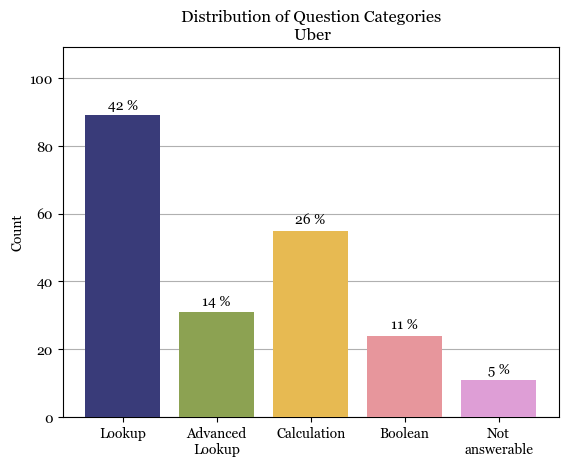

In [ ]:
import textwrap
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# plot the distribution of the categories
# also show the percentage of the categories as numbers
categories = [doc["category"] for doc in id_mapper_data if doc["id"] == doc_ids[0]]
unique_categories = ["lookup", "advanced lookup", "calculation", "boolean", "not answerable"]
labels = ["Lookup", "Advanced Lookup", "Calculation", "Boolean", "Not answerable"]
category_counts = [categories.count(cat) for cat in unique_categories]
category_percentages = [count / len(categories) for count in category_counts]

# Wrap labels if they are too long
wrapped_labels = [textwrap.fill(label, 11) for label in labels]

# Define colors for each category
colors = cm.get_cmap('tab20b', len(unique_categories))

fig, ax = plt.subplots()
bars = ax.bar(unique_categories, category_counts, color=[colors(i) for i in range(len(unique_categories))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Categories\n Uber", fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(category_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, cat in enumerate(unique_categories):
    ax.text(i, category_counts[i] + 2, f"{int(category_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing

ax.yaxis.grid(True, zorder=0)
plt.show()

# save plot to pdf
fig.savefig("../data/results/category_distribution_sec_filings_uber.pdf", bbox_inches='tight')

420


/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/481109210.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_categories))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/481109210.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


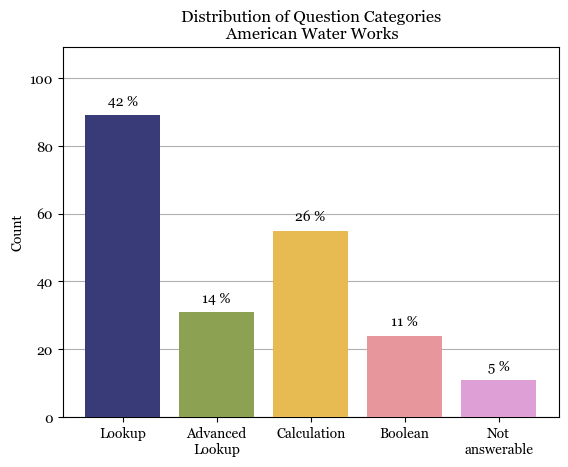

In [ ]:
import textwrap
import matplotlib.cm as cm

plt.rcParams['font.family'] = 'Georgia'

# plot the distribution of the categories
# also show the percentage of the categories as numbers
categories = [doc["category"] for doc in id_mapper_data if doc["id"] == doc_ids[0]]
unique_categories = ["lookup", "advanced lookup", "calculation", "boolean", "not answerable"]
labels = ["Lookup", "Advanced Lookup", "Calculation", "Boolean", "Not answerable"]
category_counts = [categories.count(cat) for cat in unique_categories]
print(sum(category_counts)*2)
category_percentages = [count / len(categories) for count in category_counts]

# Wrap labels if they are too long
wrapped_labels = [textwrap.fill(label, 11) for label in labels]

# Define colors for each category
colors = cm.get_cmap('tab20b', len(unique_categories))

fig, ax = plt.subplots()
bars = ax.bar(unique_categories, category_counts, color=[colors(i) for i in range(len(unique_categories))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Categories\n American Water Works", fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(category_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')
for i, cat in enumerate(unique_categories):
    ax.text(i, category_counts[i] + 3, f"{int(category_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing

ax.yaxis.grid(True, zorder=0)
plt.show()

# save plot to pdf
fig.savefig("../data/results/category_distribution_sec_filings_awk.pdf", bbox_inches='tight')

/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/2000132418.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20b', len(unique_domains))
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/2000132418.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')
/var/folders/7d/g2j4hccn7pxdk3cp75110hcr0000gn/T/ipykernel_18528/2000132418.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, fontname='Georgia')


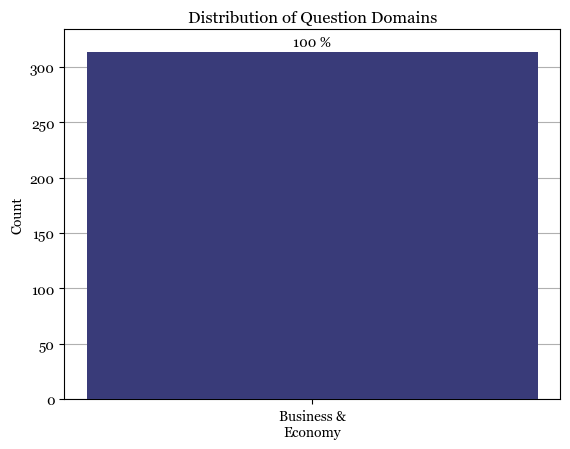

In [ ]:
# plot the distribution of domains
# also show the percentage of the domains as numbers
domains = [doc["domain"] for doc in id_mapper_data]
unique_domains = list(set(domains))
domain_counts = [domains.count(domain) for domain in unique_domains]
domain_percentages = [count / len(domains) for count in domain_counts]


# Wrap labels if they are too long
labels = ["Business & Economy", "Science & Technology", "Politics & Society", "Sports &   Entertainment", "Geography &  Transportation"]
wrapped_labels = [textwrap.fill(label, 14) for label in labels]

# Define colors for each domain
colors = cm.get_cmap('tab20b', len(unique_domains))

fig, ax = plt.subplots()
bars = ax.bar(unique_domains, domain_counts, color=[colors(i) for i in range(len(unique_domains))], zorder=3)
ax.set_ylabel("Count", fontname='Georgia')
ax.set_title("Distribution of Question Domains", fontname='Georgia')
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

# Extend the y-axis
ax.set_ylim(0, max(domain_counts) + 20)

# Set the wrapped labels
ax.set_xticklabels(wrapped_labels, fontname='Georgia')

for i, domain in enumerate(unique_domains):
    ax.text(i, domain_counts[i] + 5, f"{int(domain_percentages[i]*100)} %", ha="center", fontname='Georgia', zorder=4)  # Adjusted spacing
    
ax.yaxis.grid(True, zorder=0)
plt.show()

# save figure to pdf
fig.savefig("../data/results/distribution_of_question_domains_wikitables.pdf", bbox_inches='tight')

In [ ]:
document_summary_path = "../data/evaluation/dataset_analysis/analysis-2025-03-10-09-44-29.json"
document_summary = load_json(document_summary_path)

names = ["html", "csv", "json-records", "markdown", "tabtree-base", "tabtree-text", "tabtree-text-with-context-intersection", "tabtree-text-augmented-with-context-intersection", "tabtree-context-empty"]
display_names = ["HTML", "CSV", "JSON", "Markdown", "TabTree Base", "TabTree - Text", "TabTree - Text w/ Context-I.", "TabTree - Text-Augm. w/ Context-I.", "TabTree - Context Empty"]


# 0: html, 1: plain text, # 2: csv
document_list = document_summary[0]['dataset_summary']['document_list']



for i, table_data_html in enumerate(document_summary[0]['dataset_summary']['table_list']):    
    print(f"\nDocument: {document_list[i]['id']}")
    print(f"Num of HTML tokens: {document_list[i]['num_tokens']}")
    print(f"Num of tables: {len(table_data_html['num_tokens'])}")
    
    
    print("\nRows:")
    print(f"  Avg: {table_data_html["rows_statistics"]["avg"]}")
    print(f"  Min: {table_data_html["rows_statistics"]["min"]}")
    print(f"  Max: {table_data_html["rows_statistics"]["max"]}")
    print(f"  Std: {table_data_html["rows_statistics"]["std"]}")

    print("\nColumns:")
    print(f"  Avg: {table_data_html["columns_statistics"]["avg"]}")
    print(f"  Min: {table_data_html["columns_statistics"]["min"]}")
    print(f"  Max: {table_data_html["columns_statistics"]["max"]}")
    print(f"  Std: {table_data_html["columns_statistics"]["std"]}")


    print("\nTokens HTML:")
    print(f"  Avg: {table_data_html["token_statistics"]["avg"]}")
    print(f"  Min: {table_data_html["token_statistics"]["min"]}")
    print(f"  Max: {table_data_html["token_statistics"]["max"]}")
    print(f"  Std: {table_data_html["token_statistics"]["std"]}")
    
    print("\nTokens TabTree Text:")
    table_data_tabtree = document_summary[1]['dataset_summary']['table_list'][i]
    
    print(f"  Avg: {table_data_tabtree["token_statistics"]["avg"]}")
    print(f"  Min: {table_data_tabtree["token_statistics"]["min"]}")
    print(f"  Max: {table_data_tabtree["token_statistics"]["max"]}")
    print(f"  Std: {table_data_tabtree["token_statistics"]["std"]}")





Document: uber-20231231.htm
Num of HTML tokens: 185120
Num of tables: 103

Rows:
  Avg: 10.407766990291263
  Min: 1
  Max: 48
  Std: 8.136501589778236

Columns:
  Avg: 9.019417475728156
  Min: 2
  Max: 31
  Std: 5.1350321323698935

Tokens HTML:
  Avg: 722.5825242718447
  Min: 63
  Max: 3974
  Std: 708.6233820293236

Tokens TabTree Text:
  Avg: 1917.8725490196077
  Min: 110
  Max: 10124
  Std: 2023.6332336044509

Document: awk-20231231.htm
Num of HTML tokens: 194264
Num of tables: 114

Rows:
  Avg: 10.587719298245615
  Min: 1
  Max: 46
  Std: 7.994308725048211

Columns:
  Avg: 9.587719298245615
  Min: 1
  Max: 26
  Std: 5.597322987193156

Tokens HTML:
  Avg: 781.578947368421
  Min: 54
  Max: 3490
  Std: 680.004203995478

Tokens TabTree Text:
  Avg: 2298.157894736842
  Min: 74
  Max: 18169
  Std: 2842.9393535655504


In [ ]:
all_serialization_approaches_path = "../data/evaluation/dataset_analysis/analysis-2025-04-05-11-17-13.json"
all_serialization_approaches = load_json(all_serialization_approaches_path)

names = ["html", "csv", "json-records", "markdown", "tabtree-base", "tabtree-text", "tabtree-text-with-context-intersection", "tabtree-text-augmented-with-context-intersection", "tabtree-context-empty"]
display_names = ["HTML", "CSV", "JSON", "Markdown", "TabTree Base", "TabTree - Text", "TabTree - Text w/ Context-I.", "TabTree - Text-Augm. w/ Context-I.", "TabTree - Context Empty"]

for i, data in enumerate(all_serialization_approaches):
    name = [temp_name for temp_name in names if temp_name in data["table_serialization_mode"]][0]
    index_name = names.index(name)
    
    table_data = data['dataset_summary']['table_statistics']
    
    
    
    print(f"\nSerialization mode: {display_names[index_name]}")
